Berikan masalah di sini

Cell ini untuk menampilkan data

In [126]:
import pandas as pd
#df = pd.read_excel('', index_col=0, header= None )
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv')
#df.columns =[]

null check

In [127]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [135]:
print(df['Age'].shape)

(200,)


In [136]:
print(df[['Age']].shape)

(200, 1)


In [137]:
df['Age'].to_frame()

,Age
0,23
1,47
2,47
3,28
4,61
...,...
195,56
196,16
197,52
198,23


Daftar kolom, tipe dan jumlahnya

In [6]:
print('Daftar Kolom' )
df.dtypes.to_frame()


Daftar Kolom


,0
Age,int64
Sex,object
BP,object
Cholesterol,object
Na_to_K,float64
Drug,object


In [ ]:
Cek Jumlah baris dan kolom keseluruhan

In [7]:
df.shape

(200, 6)

Cek deskriptif statisktik

In [8]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


Mengecek jumlah kolom

In [ ]:
df['nama_kolom'].value_counts()

Tahapan Machine Learning Classification with K-Nearest Neighbor
1. Feature set (menentukan Independent(X) dan Dependent Variable(Y))
2. Normalize Data
3. Train Test Split
4. Training
5. Predicting
6. Accuracy evaluation


1. Menentukan Dependent Variable (x) dan independent variable(y)

In [ ]:
var_x = df[['kolom a', 'kolom b', 'kolom c']]
var_x[0:5]

In [10]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [11]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [13]:
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [ ]:
var_y = df[['kolom yang dicari']]
var_y[0:5]

2. Normalisasi Data (Standardization data zero mean and unit variance)

In [14]:
from sklearn import preprocessing
#from sklearn.preprocessing import MinMaxScaler

In [ ]:
var_x = preprocessing.StandardScaler().fit(X).transform(var_x.astype(float))
X[0:5]



3. Train Test Split
Training : 80 %
Testing  : 20 %

Training : 66.66 %
Testing  : 33.33 %


In [ ]:
from sklearn.model_selection import train_test_split
class Split:
    def __init__(self, x, y, size_test=0.2, rndm_state=4):
        #init pure x and y 
        self.x = x
        self.y = y
        self.size_test = size_test
        self.random = rndm_state
               
        #scklearn train test split
        self.xtrain, self.xtest, self.ytrain, self.ytest = train_test_split( self.x, self.y, test_size= self.size_test, random_state=self.random)
        #empty variables for another class
        self.x_train = self.xtrain
        self.y_train = self.ytrain
        self.x_test = self.xtest
        self.y_test = self.ytest

In [125]:
a = Split()

NameError: name 'Split' is not defined

In [ ]:
class KNN(Split) :
    def __init__(self, x, y, size_test=0.2, rndm_state=4):
    def __init__(self, train_x, train_y, test_x, test_y, k_start, k_end):
        
        self.x_train = self.xtrain
        self.y_train = self.ytrain
        self.x_test = self.xtest
        self.y_test = self.ytest

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
#Popular integer random state seeds are 0 and 42
import random
rndm = random.randrange(0,42)
rndm

6

In [60]:
#sklearn.model_selection.train_test_split(*arrays, **options) 
#test size 0.2 meaning train 80% test 20%
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=rndm)


In [61]:
print(x_train.shape)
print(y_train.shape)

(170, 5)
(170,)


In [62]:
# your code
print(x_test.shape)
print(y_test.shape)


(30, 5)
(30,)


K nearest neighbor (KNN)

4. Training
Jumlah k ditentukan sendiri

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib 
import seaborn as sns

In [ ]:
class KNN():
    def __init__(self, train_x, train_y, test_x, test_y, k_start, k_end):
        #data x dan y yang belum dibagi
        #data yang telah dibagi
        self.train_x = train_x
        self.train_y = train_y
        self.test_x = test_x
        self.test_y = test_y
        self.k_start = k_start
        self.k_end = k_end
        self.k_list = []
        self.test_accuray_list = []
        
        for K in range(self.k_start, self.k_end) :
            neigh = KNeighborsClassifier(n_neighbors = K).fit(self.train_x, self.train_y)
            yhat = neigh.predict(self.test_x)
            test_acc = metrics.accuracy_score(self.test_y, yhat)
            self.k_list.append(K)
            self.test_accuray_list.append(test_acc)
        
        
    def k_df (self):
        #Membuat dataframe dari list k
        df_k = pd.DataFrame(data=self.k_list, columns=['k'])
        #Menambahkan dataframe dari list tes akurasi
        df_k['test_accuracy'] = self.test_accuray_list
        #menampilkan k dengan tes akurasi tertinggi
        return df_k.sort_values(by=['test_accuracy'], ascending = False).head(1)
        
        
    def plot_k (self, line_color='green'):
        sns.set_style("darkgrid")
        sns.lineplot(x=self.k_list, y=self.test_accuray_list, color=line_color)
        plt.xlabel('K')
        plt.ylabel('Accuracy')
        plt.title('K vs Accuracy')
        plt.show()
        
    def y_hat (self, k) :
        neigh = KNeighborsClassifier(n_neighbors = k).fit(self.train_x, self.train_y)
        yhat = neigh.predict(self.test_x)
        return yhat 

5. Predicting

6. Accuracy Evaluation (accuracy classification score equal to the jaccard_similarity_score)

In [ ]:
p2 = KNN(X1_train, y1_train, X1_test, y1_test, 1, len(X1_train)+1)


In [ ]:
p2.k_df()

In [ ]:
p2.plot_k()

In [ ]:
p2.y_hat(38)[0:5]

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [56]:
class DTree :
    def __init__(self, train_x, train_y, test_x, test_y):
        #data x dan y yang belum dibagi
        #data yang telah dibagi
        self.train_x = train_x
        self.train_y = train_y
        self.test_x = test_x
        self.test_y = test_y
        
    def prediction(self):
        dtree_training = DecisionTreeClassifier(criterion='entropy', max_depth = None).\
        fit(self.train_x,self.train_y)
        predTree = (dtree_training).predict(self.test_x)
        return predTree
    
    def evaluation(self, fungsi_prediction):
        return metrics.accuracy_score(self.test_y, fungsi_prediction)
       

In [63]:
P7 = DTree(x_train, y_train, x_test, y_test)

In [64]:
P7.prediction()

array(['drugA', 'drugY', 'drugC', 'drugX', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugB', 'drugY', 'drugX', 'drugX',
       'drugA', 'drugY', 'drugY', 'drugB', 'drugC', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugB', 'drugX'], dtype=object)

In [65]:
P7.evaluation(P7.prediction())

1.0

In [ ]:
class DTree_Extension(DTree):
    def __init__(self, train_x, train_y, test_x, test_y,  Criterion='entropy'):
        self.criter = Criterion
        # invoking the __init__ of the parent class  
        super().__init__(train_x, train_y, test_x, test_y)  
        
    def brute_depth (self, start, finish):
        max_depth_list =[metrics.accuracy_score(self.test_y, (DecisionTreeClassifier\
        (criterion=self.criter,max_depth = j).fit(self.train_x, self.train_y).predict(self.test_x))) \
        for j in range(start, finish)]
        return max_depth_list
    

In [66]:
 pqr = DTree_Extension(x_train, y_train, x_test, y_test)

In [67]:
pqr.brute_depth(1,51)

[0.7333333333333333,
 0.8,
 0.9,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [68]:
df_dtree = pd.DataFrame([x for x in range(1,51)], columns=['depth'])

In [71]:
df_dtree.head()

,depth,accuracy
0,1,0.733333
1,2,0.800000
2,3,0.900000
3,4,1.000000
4,5,1.000000


In [70]:
df_dtree['accuracy'] = pqr.brute_depth(1,51)

In [54]:
df_dtree.drop(['cek'], axis=1, inplace=True)

In [ ]:
df_cek = []

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

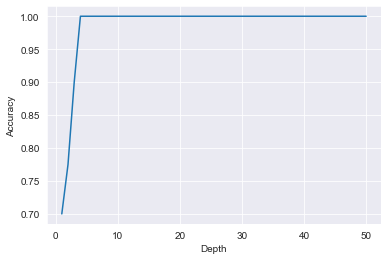

In [48]:
sns.set_style('darkgrid')
sns.lineplot(data= df_dtree, x='depth', y='accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [106]:
F = 'Muhammad'
L = 'Subagja'

In [121]:
class Person:
    #fullname = []
    def __init__(self, Fname = F, Lname=L):
        self.firstname = Fname
        self.lastname = Lname
        self.fullname = self.firstname + self.lastname
         

In [122]:
Person().fullname

'MuhammadSubagja'

In [123]:

class Student(Person):
    def __init__(self, z):
        self.nama = 'a'
        self.z = z 
        super().__init__(Person().fullname)
    def printname(self):
        print(self.nama * self.z )
        pass
    def full(self):
        

In [124]:
xc = Student(  3)
xc.printname()

aaa
